In [211]:
import pandas as pd
df=pd.read_csv("customer_churn_data.csv")
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [212]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [213]:
df["InternetService"]=df["InternetService"].fillna("")
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [214]:
df.duplicated().sum()
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [215]:
numeric_cols_data=df.select_dtypes(include=["number"])
numeric_cols_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


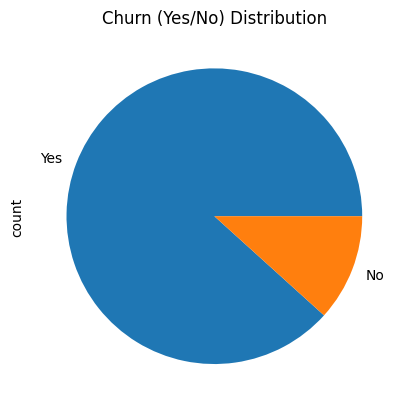

In [216]:
import matplotlib.pyplot as plt
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No) Distribution")
plt.show()

In [217]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [218]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [219]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

At the lower terms we can see that the monthly charge average decreases

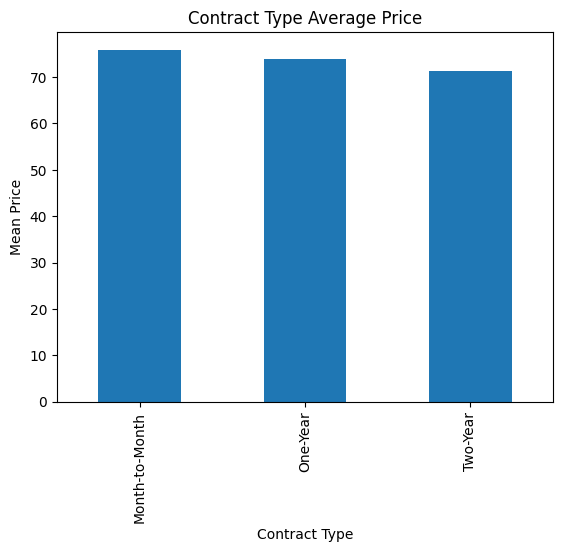

In [220]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type", loc='center')
plt.title("Contract Type Average Price")
plt.show()

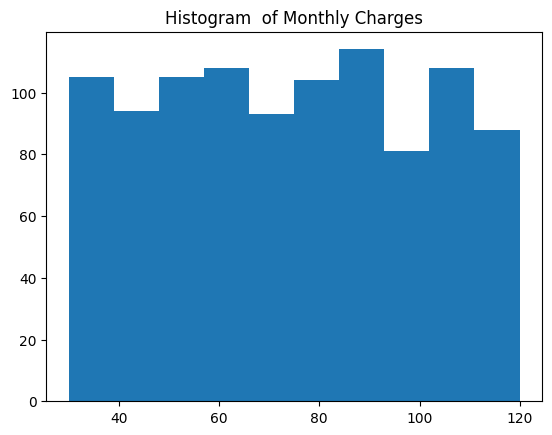

In [221]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram  of Monthly Charges")
plt.show()

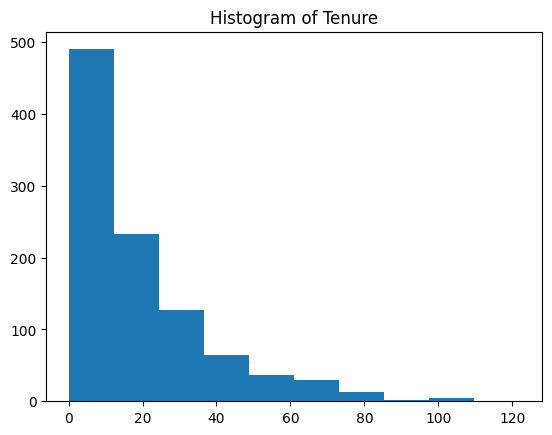

In [222]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [223]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [224]:
X=df[["Age","Gender","Tenure","MonthlyCharges"]]
Y=df["Churn"]
Y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [225]:
Y=Y.copy()
Y.loc[Y=="Yes"]=1
Y.loc[Y=="No"]=0
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: object

In [226]:
import numpy as np
import pandas as pd

X = X.copy()
X.loc[X["Gender"] == "Female", "Gender"] = 1
X.loc[X["Gender"] == "Male", "Gender"] = 0
X["Gender"] = X["Gender"].astype(int)
X



,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [227]:
type(X["Gender"][0])

numpy.int64

In [228]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: object

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [230]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [231]:
import joblib
joblib.dump(scaler,"scaler.pkl")


['scaler.pkl']

In [232]:
X_test=scaler.fit_transform(X_test)

In [233]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is :{} ".format(accuracy_score(Y_test,predictions)))

In [234]:
import warnings
warnings.filterwarnings("ignore")

In [235]:
Y_train


29     0
535    1
695    0
557    1
836    1
      ..
106    1
270    1
860    1
435    1
102    1
Name: Churn, Length: 800, dtype: object

In [236]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
Y_train = Y_train.astype(int)
log_model.fit(X_train,Y_train)

LogisticRegression()

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
Y_pred=log_model.predict(X_test)

In [239]:
Y_test = Y_test.astype(int)
a=modelperformance(Y_pred)

Accuracy score on model is :0.885 


In [240]:
from sklearn.neighbors import KNeighborsClassifier


In [241]:
param_grid={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance']
            }

In [242]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)


In [243]:
gridkn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [244]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [246]:
Y_pred=gridkn.predict(X_test)

In [247]:
modelperformance(Y_pred)

Accuracy score on model is :0.88 


In [248]:
from sklearn.svm import SVC
svm=SVC()
param_grid={
    'C':[0.01,0.1,0.5,1],
    "kernel":["linear","rbf","poly"]
}

In [249]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [250]:
gridsvc.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [251]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [253]:
Y_pred=gridsvc.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [254]:
modelperformance(Y_pred)

Accuracy score on model is :0.885 


In [255]:
from sklearn.tree import DecisionTreeClassifier


In [256]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [260]:
gridkn=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [261]:
Y_train=Y_train.astype(int)
gridkn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [262]:
gridkn.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [263]:
Y_pred=gridkn.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [264]:
modelperformance(Y_pred)

Accuracy score on model is :0.83 


In [265]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [266]:
param_grid={
    'n_estimators':[32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap':[True,False]
}

In [268]:
gridrf=GridSearchCV(rf,param_grid,cv=5)


In [269]:
gridrf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [270]:
gridrf.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 32}

In [271]:
Y_pred=gridrf.predict(X_test)

In [272]:
modelperformance(Y_pred)

Accuracy score on model is :0.865 


In [274]:
best_model=gridsvc.best_estimator_

In [275]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [276]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')